In [1]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('epileptic_seizure.csv')
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [4]:
df = df.drop(columns=['Unnamed: 0'])
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [5]:
df[df.isnull().any(axis=1)]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 179 entries, X1 to y
dtypes: int64(179)
memory usage: 15.7 MB


In [8]:
df['y'].value_counts()

y
4    2300
1    2300
5    2300
2    2300
3    2300
Name: count, dtype: int64

In [9]:
df['y'].unique()

array([4, 1, 5, 2, 3])

In [10]:
df['y'] = df['y'].apply(lambda x: 1 if x==1 else 0)  # Convert to binary classification

In [11]:
df['y'].value_counts()

y
0    9200
1    2300
Name: count, dtype: int64

In [12]:
y = df['y']
X = df.drop(columns=['y'])

In [29]:
X.shape

(11500, 178)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((8625, 178), (2875, 178), (8625,), (2875,))

In [ ]:
## creating a 'pkl' file to store scaler

# joblib.dump(scaler, 'model/scaler.pkl')

['model/scaler.pkl']

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [59]:
# X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

In [26]:
models = {
    'LogisticRegression' : LogisticRegression(),
    'Search Vector Machine Classifier' : SVC(),
    'K-Nearest Neighbours Classifiers' : KNeighborsClassifier(),
    'Decision Tree Classifier' : DecisionTreeClassifier(),
    'Random Forest Classifier' : RandomForestClassifier(),
    'Ada Boost Classifier' : AdaBoostClassifier(),
    'Gradient Boosting Classifier' : GradientBoostingClassifier(),
    'XGB Classifier' : XGBClassifier()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_scaled, y_train)
    
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    print(f"Model : {list(models.keys())[i]}")
    print("Train Data : ")
    print("Accuracy Score: ", accuracy_score(y_train, y_train_pred))
    print("Confusion Metricx: \n", confusion_matrix(y_train, y_train_pred))
    print("Precision Score: ", precision_score(y_train, y_train_pred))
    print("Recall Score: ", recall_score(y_train, y_train_pred))
    print("\n")
    print("Test Data : ")
    print("Accuracy Score:  ", accuracy_score(y_test, y_test_pred))
    print("Confusion Metricx: \n", confusion_matrix(y_test, y_test_pred))
    print("Precision Score: ", precision_score(y_test, y_test_pred))
    print("Recall Score:  ", recall_score(y_test, y_test_pred))
    print("="*50)
    print("\n")
    

Model : LogisticRegression
Train Data : 
Accuracy Score:  0.8293333333333334
Confusion Metricx: 
 [[6898    2]
 [1470  255]]
Precision Score:  0.9922178988326849
Recall Score:  0.14782608695652175


Test Data : 
Accuracy Score:   0.8170434782608695
Confusion Metricx: 
 [[2298    2]
 [ 524   51]]
Precision Score:  0.9622641509433962
Recall Score:   0.08869565217391304


Model : Search Vector Machine Classifier
Train Data : 
Accuracy Score:  0.9809855072463768
Confusion Metricx: 
 [[6857   43]
 [ 121 1604]]
Precision Score:  0.9738919247115968
Recall Score:  0.9298550724637681


Test Data : 
Accuracy Score:   0.9718260869565217
Confusion Metricx: 
 [[2276   24]
 [  57  518]]
Precision Score:  0.955719557195572
Recall Score:   0.9008695652173913


Model : K-Nearest Neighbours Classifiers
Train Data : 
Accuracy Score:  0.9379710144927537
Confusion Metricx: 
 [[6896    4]
 [ 531 1194]]
Precision Score:  0.996661101836394
Recall Score:  0.6921739130434783


Test Data : 
Accuracy Score:   0.9

## Performing PCA :-


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99)  

In [46]:
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [47]:
print(f"Number of components kept: {pca.n_components_}")


Number of components kept: 53


In [ ]:
## saving a 'pkl' file for pca

# joblib.dump(pca, 'model/pca.pkl')

['model/pca.pkl']

In [56]:
from sklearn.svm import SVC
model = SVC(kernel='rbf', C=10, gamma='scale', probability=True)
model.fit(X_train_pca, y_train)
y_train_pred_pca = model.predict(X_train_pca)
y_test_pred_pca = model.predict(X_test_pca)

In [ ]:
## saving the svc model to a pickle file

# joblib.dump(model, "model/svm_model.pkl")

['model/svm_model.pkl']

In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

print("Training data Accuracy:- ")
print("Accuracy Score:  ", accuracy_score(y_train, y_train_pred_pca))
print("Confusion Metricx: \n", confusion_matrix(y_train, y_train_pred_pca))
print("Precision Score: ", precision_score(y_train, y_train_pred_pca))
print("Recall Score:  ", recall_score(y_train, y_train_pred_pca))

Training data Accuracy:- 
Accuracy Score:   0.9981449275362319
Confusion Metricx: 
 [[6900    0]
 [  16 1709]]
Precision Score:  1.0
Recall Score:   0.9907246376811594


In [59]:
print("Test data Accuracy:- ")

print("Accuracy Score:  ", accuracy_score(y_test, y_test_pred_pca))
print("Confusion Metricx: \n", confusion_matrix(y_test, y_test_pred_pca))
print("Precision Score: ", precision_score(y_test, y_test_pred_pca))
print("Recall Score:  ", recall_score(y_test, y_test_pred_pca))

Test data Accuracy:- 
Accuracy Score:   0.9777391304347826
Confusion Metricx: 
 [[2272   28]
 [  36  539]]
Precision Score:  0.9506172839506173
Recall Score:   0.9373913043478261


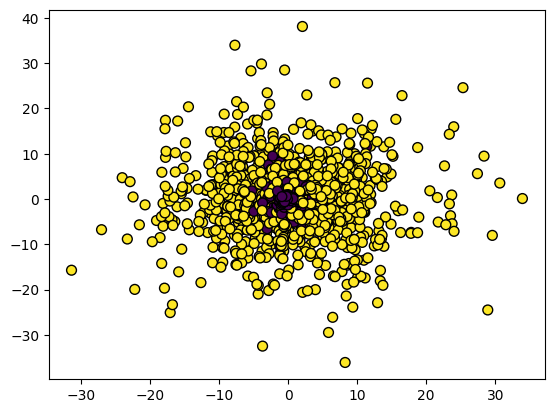

In [53]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=50)